# **Credit Card Customer churn Analysis - Extract**

## Objectives

* By the end of the extraction phase, I will:
    1. Load and extract the data
    2. Review to check the different variables
    3. Check for missing data and duplicate data
    4. Plot basic visualizatons to check how data is distributed
    5. Formulate questions for the transformation stage

## Inputs

* [Task outline](https://docs.google.com/document/d/1zF5axWut2MPIML3GppVsrWcl8ttD-fNuTYF0OpX4K9c/pub#h.6ugdhc7iwuaa)
* [Source data ](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data)   

## Outputs

* Overview of the dataset
* Basic visuals
* Baseline for transformation

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

importing libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy
import scipy.stats as stats

installing required libraries and rerunning the requirements file.

In [ ]:
pip install matplotlib seaborn pingouin

# Data load

manually downloaded the dataset

In [12]:
df = pd.read_csv("../data/BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


**Questions we need answered:**
1. What variables will help determine/predict attrition probability?
2. Can customers be grouped for targeted marketing efforts?
3. Does income impact attrition rates?
4. What financial habits lead to increased credit card usage?
5. What financial indicators indicate when a customer is most likely to churn?


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Kaggle reveals that the Naive_Bayes_Classifier column can be dropped.**

Before doing that, I want to explore the data further.

In [18]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**The dataset does not have any missing values.**

In [22]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [23]:
duplicates = df[df.duplicated()]

if len(duplicates)>0:
    print("Duplicate rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


**The dataset does not have any duplicate values.**

code-inspiration: GitHub CoPilot

**Dropping the Naive_Bayes columns as recommended in Kaggle.**

In [14]:
df1 = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


---

**The Income_Category column seems to be a range and I need to revisit this in the transformation stage to understand how I can transform it.**

**I also think some columns can be dropped, but I will check the correlation before dropping these columns as part of the transformation stage.**

---

**ASSUMPTION**:

    1. CLIENTNUM:	Unique client/customer number (identifier)

    2. Attrition_Flag:	Customer activity status: “Attrited Customer” (closed account) or “Existing Customer”
    
    3. Customer_Age:	Customer’s age in years
    
    4. Gender:	Customer’s gender: “M” for Male, “F” for Female
    
    5. Dependent_count:	Number of dependents (children or others financially dependent on the customer)
    
    6. Education_Level	Educational qualification (e.g., High School, Graduate, Doctorate, etc.)
    
    7. Marital_Status:	Marital status (e.g., Married, Single, Divorced, Unknown)
    
    8. Income_Category:	Annual income range (e.g., “Less than $40K”, “$40K–$60K”, “$60K–$80K”, etc.)
    
    9. Card_Category:	Type of credit card (e.g., Blue, Silver, Gold, Platinum)
    
    10. Months_on_book:	Period of relationship with bank (in months)
    
    11: Total_Relationship_Count:	Number of products held by the customer with the bank
    
    12: Months_Inactive_12_mon:	Number of months inactive in the last 12 months
    
    13: Contacts_Count_12_mon:	Number of contacts with the bank in the last 12 months
    
    14: Credit_Limit:	Credit limit on the card
    
    15: Total_Revolving_Bal:	Total revolving balance on the card (outstanding balance not paid off)
    
    16: Avg_Open_To_Buy:	Average open-to-buy credit line (credit limit minus current balance)
    
    17: Total_Amt_Chng_Q4_Q1:	Change in transaction amount (Q4 over Q1)
    
    18: Total_Trans_Amt:	Total transaction amount (last 12 months)
    
    19: Total_Trans_Ct:	Total transaction count (last 12 months)
    
    20: Total_Ct_Chng_Q4_Q1:	Change in transaction count (Q4 over Q1)
    
    21: Avg_Utilization_Ratio:	Average card utilization ratio (balance to credit limit)


---

# Data exploration

Differentiating numerical and categorical columns for better understanding of data distribution.

Numerical columns (15): ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Categorical columns (6): ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']




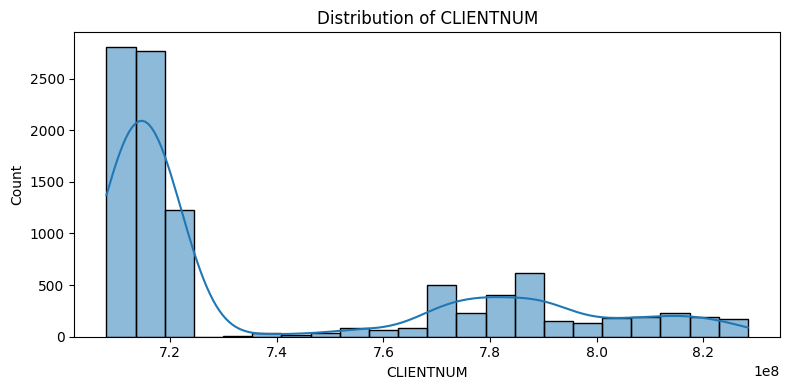

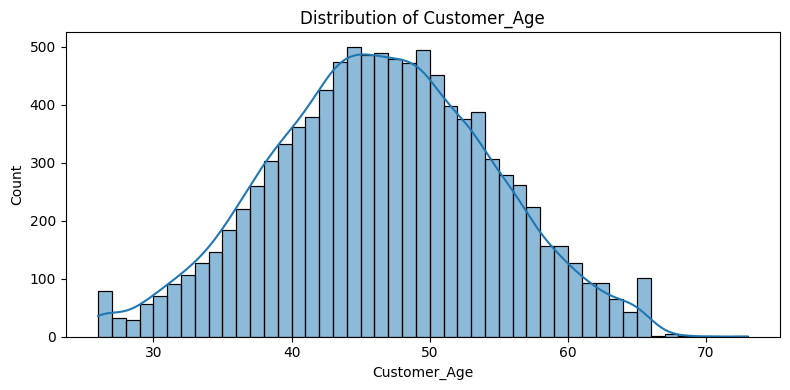

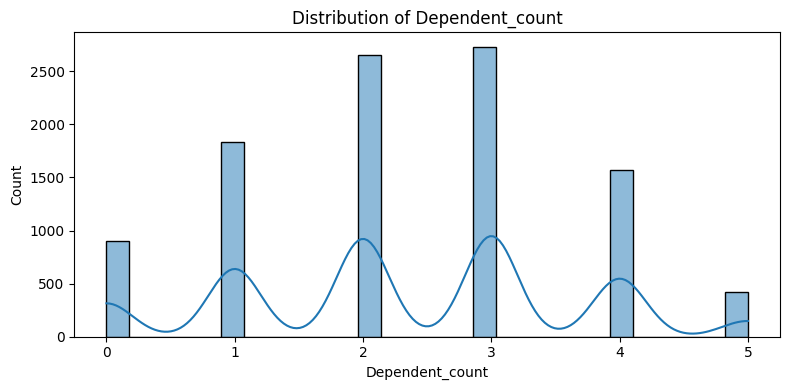

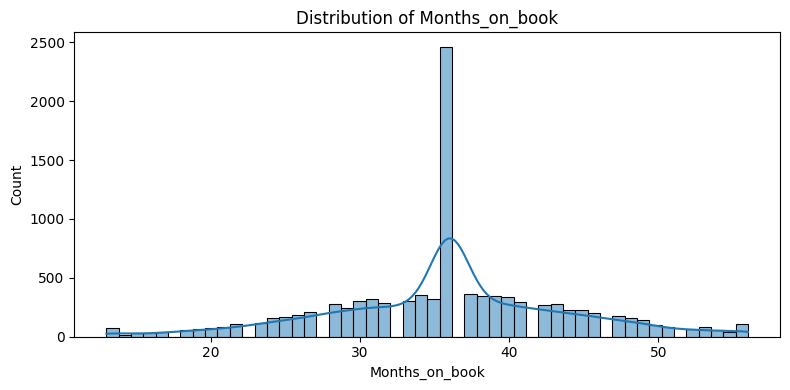

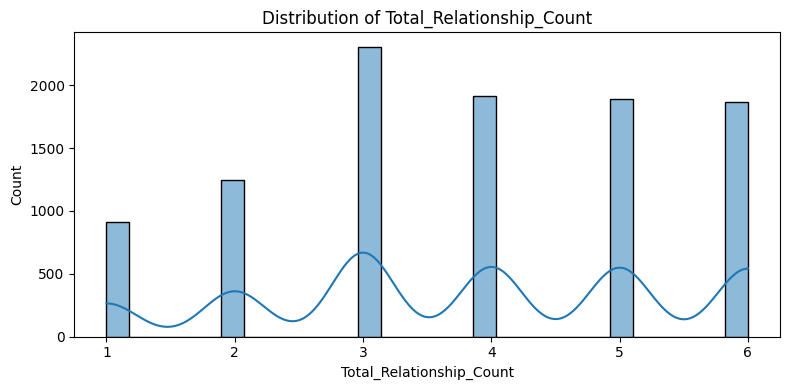

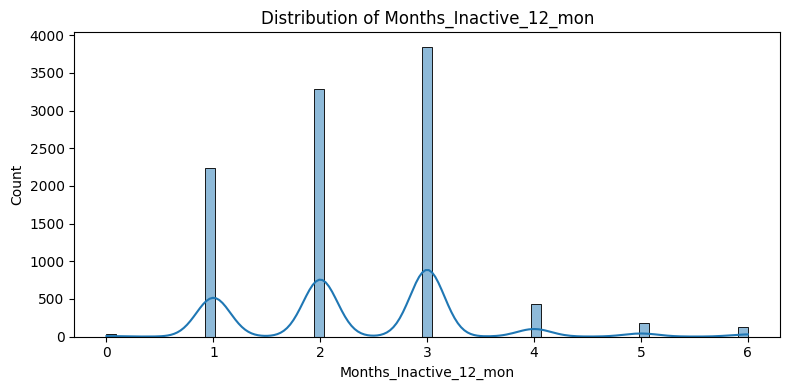

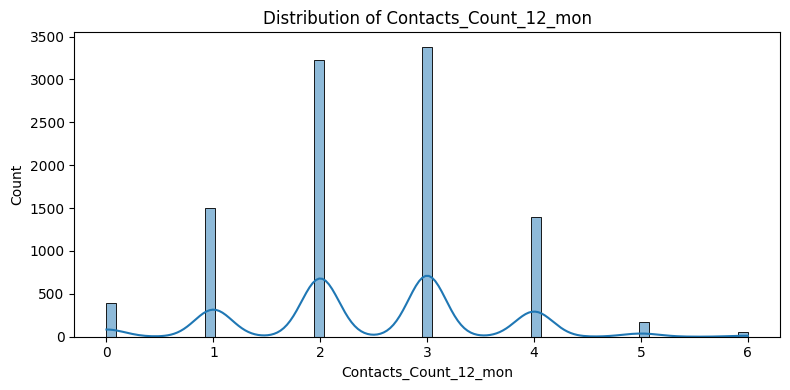

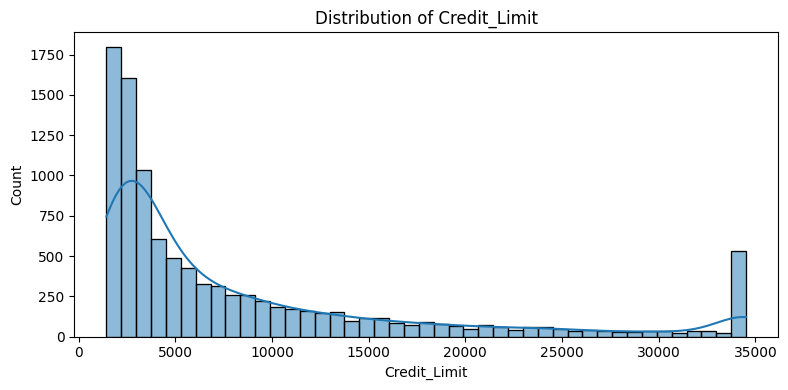

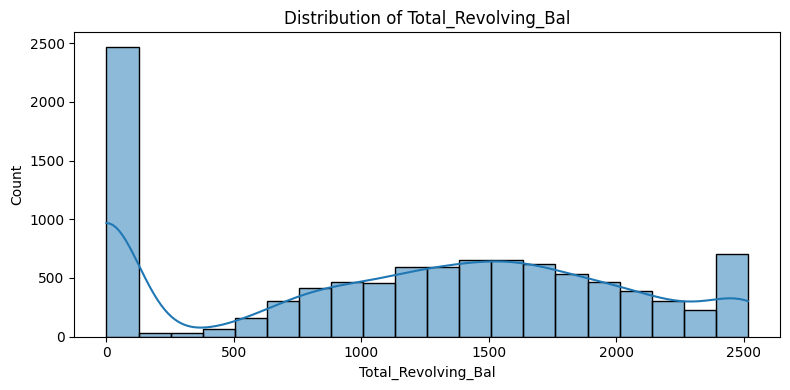

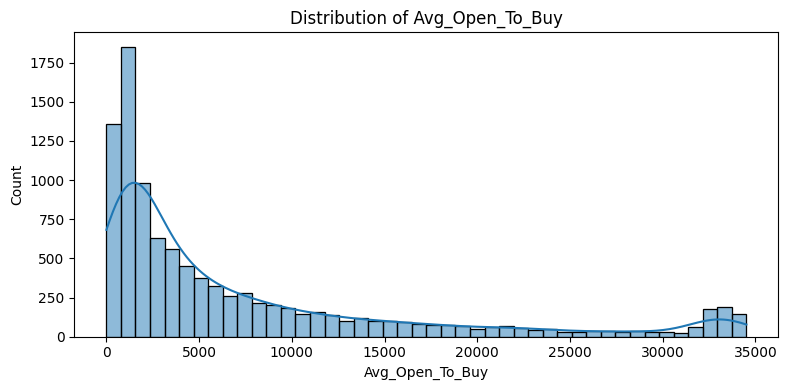

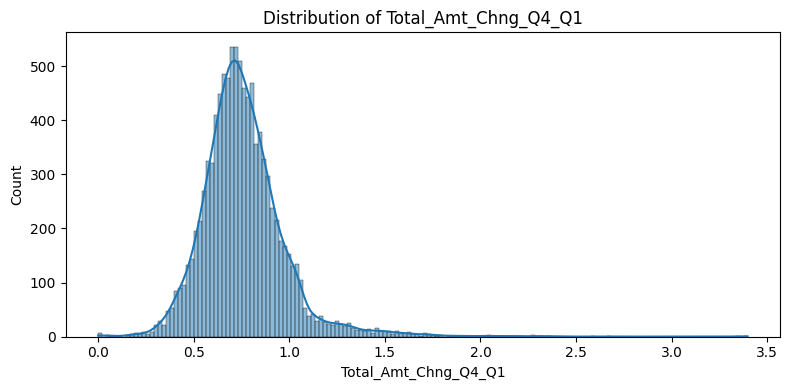

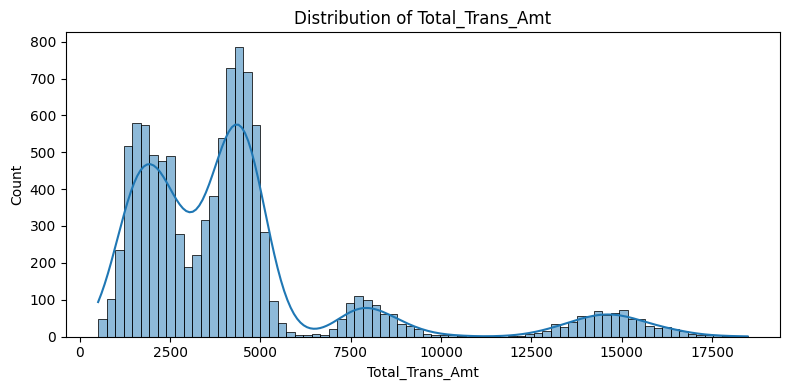

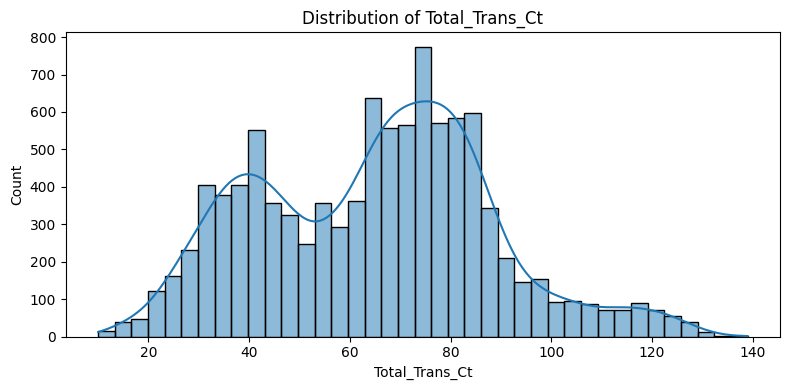

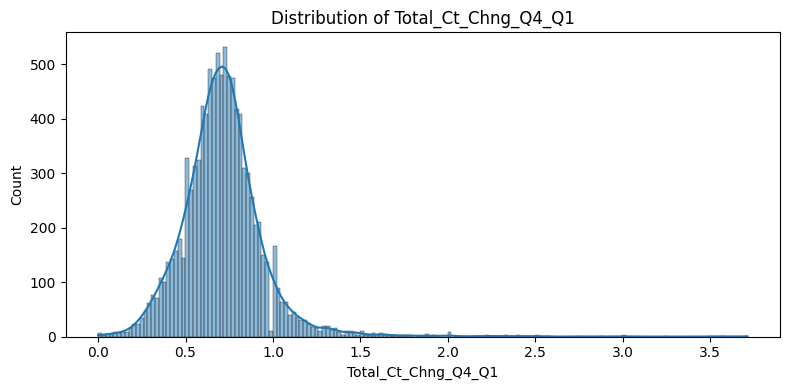

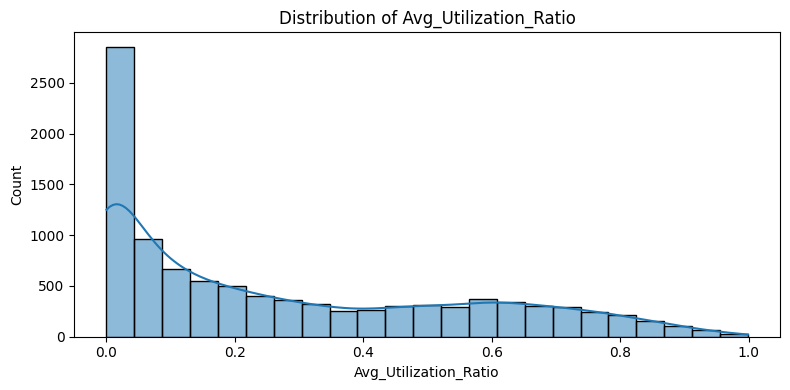

In [30]:
numerical_cols = df1.select_dtypes(include="number").columns
categorical_cols = df1.select_dtypes(include="object").columns

print(f"Numerical columns ({len(numerical_cols)}): {list(numerical_cols)}")
print("\n")
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")
print("\n")

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

There are **15 Numerical** and **6 Categorical Columns**.

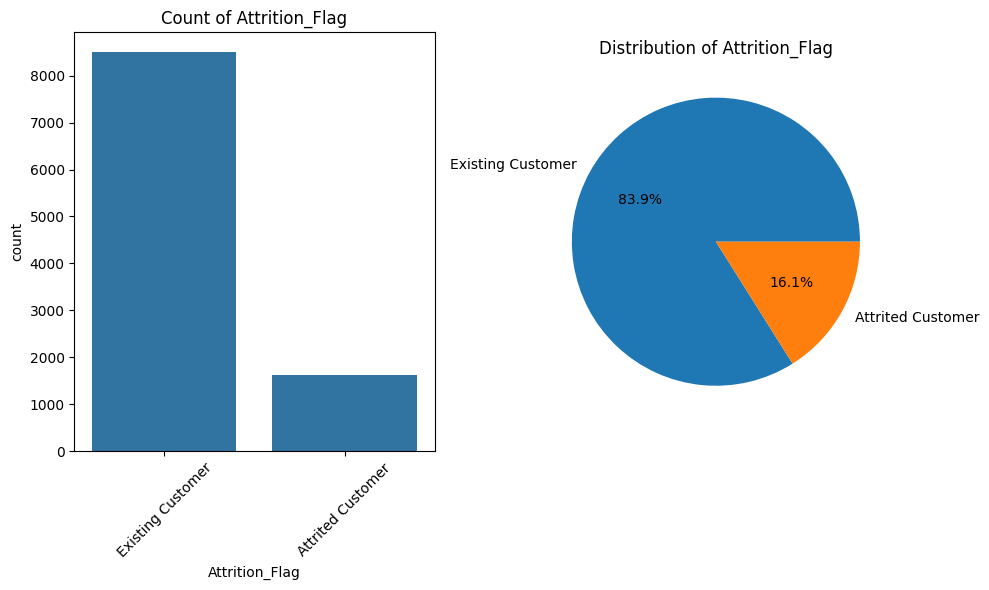


 Attrition_Flag value counts:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64





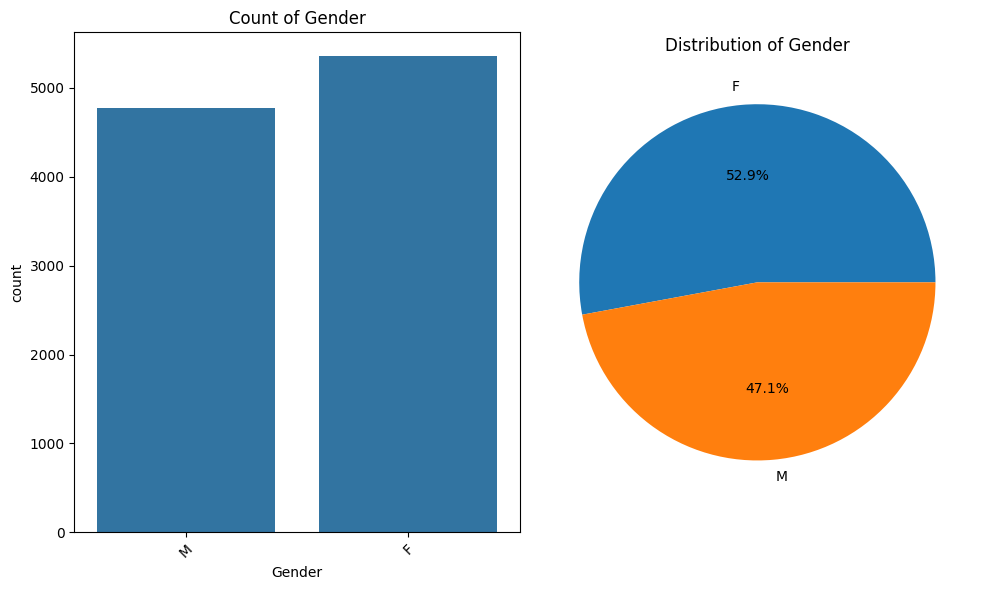


 Gender value counts:
Gender
F    5358
M    4769
Name: count, dtype: int64





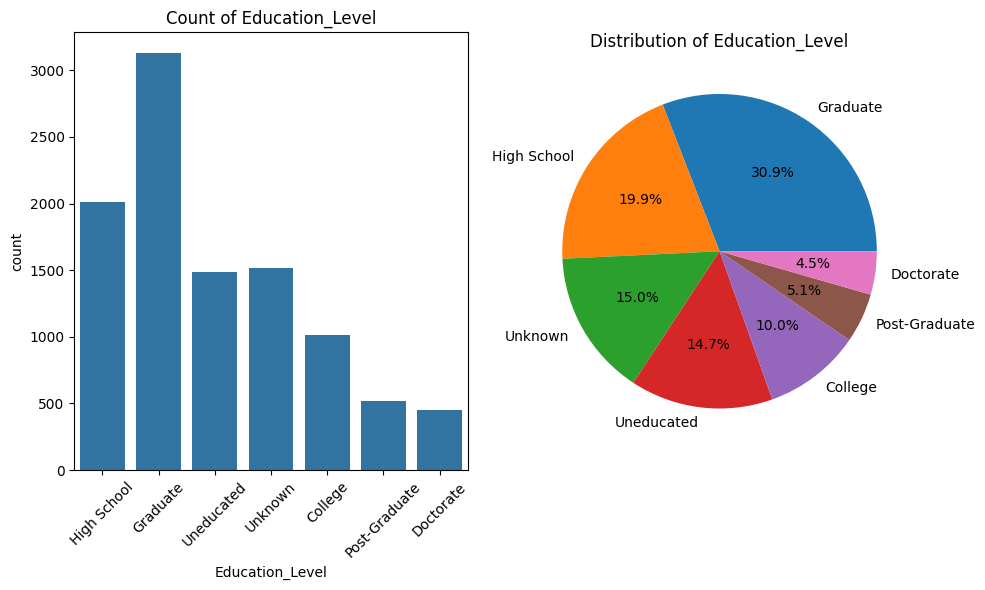


 Education_Level value counts:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64





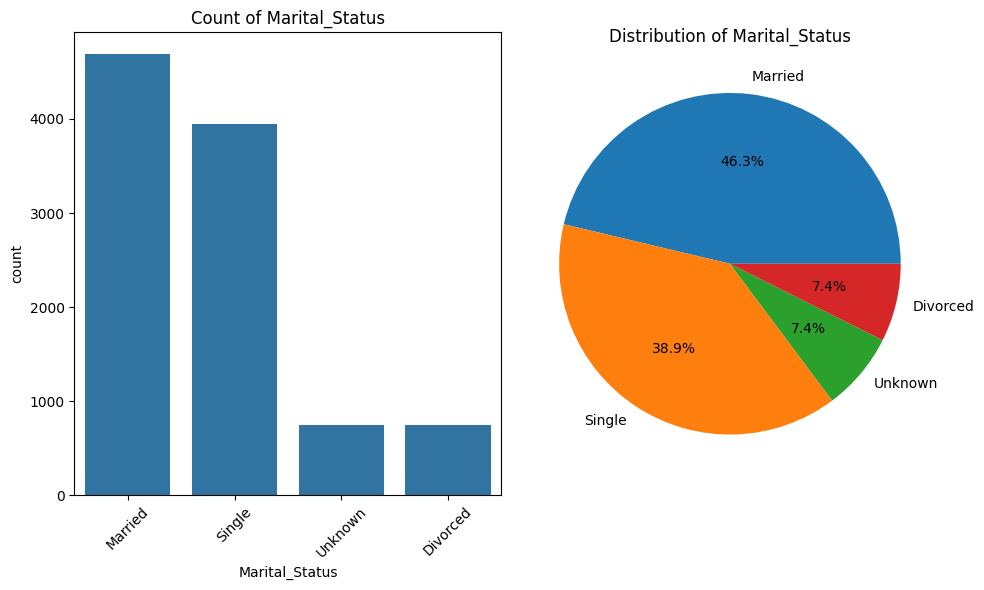


 Marital_Status value counts:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64





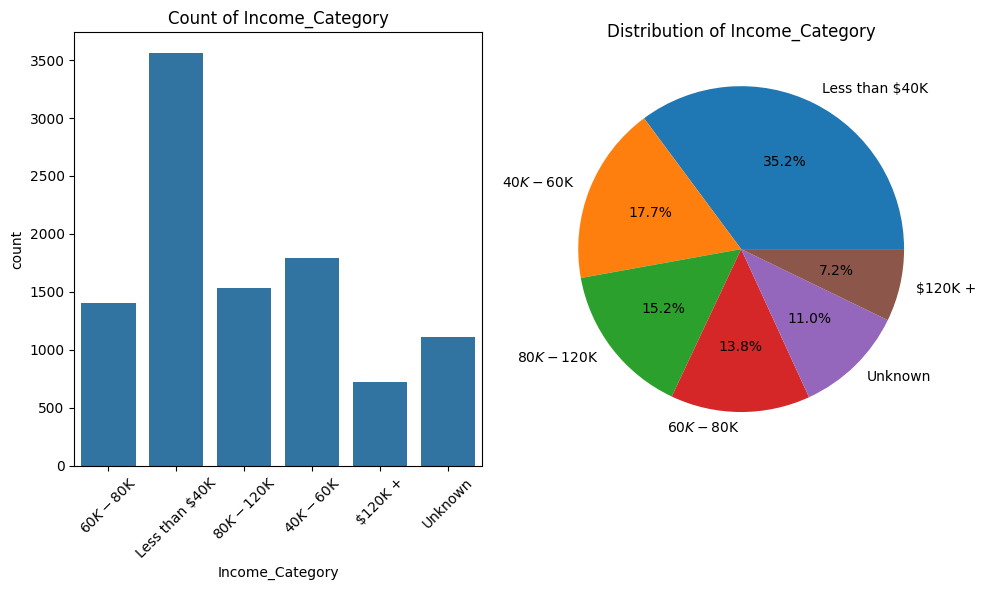


 Income_Category value counts:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64





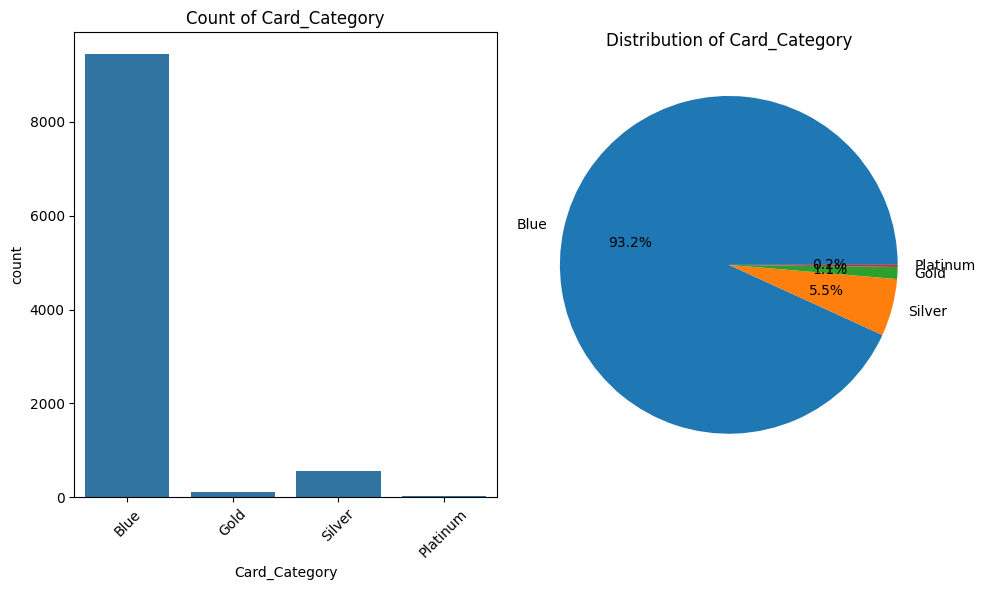


 Card_Category value counts:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64





In [31]:
for col in categorical_cols:
    plt.figure(figsize= (10,6))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df1, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    value_counts = df1[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

    print(f"\n {col} value counts:")
    print(df1[col].value_counts())
    print("\n\n")

Key insights:
1. **Attrition:** 16% (1627) customers have churned/attritied.
2. **Education:** Graduates make up a large chunk of the customers - 30.9% (3128)
3. **Income**: 35.2% (3561) earn less than 40K

---

# Correlation analysis

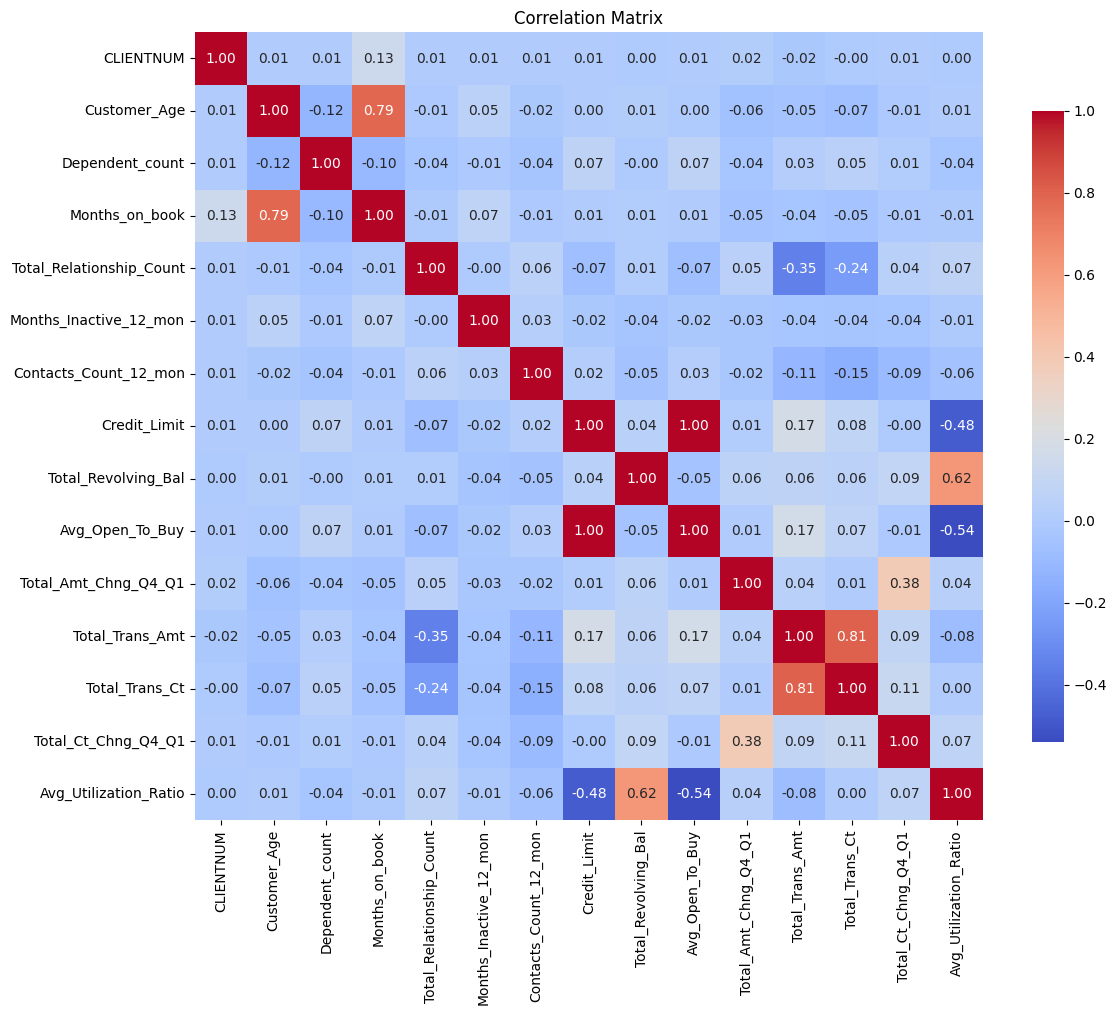

Top 10 highest correlations:
Avg_Open_To_Buy        Credit_Limit             0.995981
Credit_Limit           Avg_Open_To_Buy          0.995981
Total_Trans_Amt        Total_Trans_Ct           0.807192
Total_Trans_Ct         Total_Trans_Amt          0.807192
Customer_Age           Months_on_book           0.788912
Months_on_book         Customer_Age             0.788912
Avg_Utilization_Ratio  Total_Revolving_Bal      0.624022
Total_Revolving_Bal    Avg_Utilization_Ratio    0.624022
Total_Ct_Chng_Q4_Q1    Total_Amt_Chng_Q4_Q1     0.384189
Total_Amt_Chng_Q4_Q1   Total_Ct_Chng_Q4_Q1      0.384189
dtype: float64

NEGATIVE CORRELATIONS:
Negative correlations (most negative first):
Avg_Utilization_Ratio  Avg_Open_To_Buy            -0.538808
Avg_Open_To_Buy        Avg_Utilization_Ratio      -0.538808
Credit_Limit           Avg_Utilization_Ratio      -0.482965
Avg_Utilization_Ratio  Credit_Limit               -0.482965
Total_Trans_Amt        Total_Relationship_Count   -0.347229
                 

In [33]:
correlation_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # to exclude self-correlations

print("Top 10 highest correlations:")
print(corr_pairs.head(10))

print("\n" + "="*50)
print("NEGATIVE CORRELATIONS:")
print("="*50)

# Get negative correlations sorted from most negative to least negative
negative_corr = corr_pairs[corr_pairs < 0].sort_values(ascending=True)
print("Negative correlations (most negative first):")
print(negative_corr)

**High Positive Correlations:**
1. Total transaction amount and total transaction count have a high-correlation: **0.81**
2. Customer's age and book on months on book have a high-correlation: **0.79**
3. Total revolving balance and average utilization ratio have a high-correlation: **0.62**

**Notable Negative Correlations:**
1. Avg_Utilization_Ratio and Avg_Open_To_Buy have a strong negative correlation:
 **-0.54**
   - *This makes business sense: Higher utilization means less available credit*
2. Credit_Limit and Avg_Utilization_Ratio have a moderate negative correlation: 
**-0.48**
   - *Higher credit limits tend to result in lower utilization rates*
3. Total_Trans_Amt and Total_Relationship_Count have a moderate 
negative correlation: **-0.35**
   - *Customers with more products may have lower individual transaction amounts*

**Implications for Transformation Stage:**
- **Multicollinearity concerns**: High correlations (>0.8) may require feature selection
- **Feature engineering opportunities**: Negative correlations suggest meaningful business relationships
- **Model considerations**: Strong correlations may impact certain algorithms

**Heads-up:** 
While this correlation is valuable, I want to transform the data and 
recheck the matrix.

---

# Normality test #

The normality check provides me an overview on what kind of statistical tests I need to be using in the transformation stage.

In [18]:
pg.normality(df1, alpha=0.05)

c:\Users\mshin\vs-code-projects\hackathon1_credit-card-customer-churn-analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


,W,pval,normal
CLIENTNUM,0.744628,3.220666e-82,False
Customer_Age,0.995998,4.422522e-16,False
Dependent_count,0.936877,5.276381e-54,False
Months_on_book,0.976904,1.868765e-37,False
Total_Relationship_Count,0.920286,2.711124e-58,False
Months_Inactive_12_mon,0.867744,3.517117e-68,False
Contacts_Count_12_mon,0.928326,2.559612e-56,False
Credit_Limit,0.741835,1.838926e-82,False
Total_Revolving_Bal,0.915476,2.136130e-59,False
Avg_Open_To_Buy,0.744500,3.138800e-82,False


**The warning says that the normality analysis may not be accurate. I am progressing with checking a random sample of 5000 rows.**

Code inspired by GitHub.

In [19]:
sample_size = 5000
df1_sample = df1.sample(n=sample_size, random_state=42)
pg.normality(df1_sample, alpha=0.05)

,W,pval,normal
CLIENTNUM,0.744996,2.884491e-66,False
Customer_Age,0.996285,6.866062e-10,False
Dependent_count,0.936545,7.276401e-42,False
Months_on_book,0.977324,1.625092e-27,False
Total_Relationship_Count,0.919726,1.385631e-45,False
Months_Inactive_12_mon,0.871270,1.485582e-53,False
Contacts_Count_12_mon,0.928163,8.303331e-44,False
Credit_Limit,0.739215,1.046277e-66,False
Total_Revolving_Bal,0.916620,3.353601e-46,False
Avg_Open_To_Buy,0.742889,1.988964e-66,False


---

# Data save

Saving the data for further use.

In [34]:
df1.to_csv("../data/bank_churners_extracted.csv", index=False)

# Conclusion

Here are the key findings from the "Extract" phase:

1. The dataset does not have any missing values or duplicates.

2. Target variable: Attrition_Flag indicates 8,500 existing customers and 1,627 churned customers.

3. Some of the categorical variables—such as Attrition, Education, income categories, and more—need to be encoded so that I can run a correlation 
matrix before further data transformation the data further. This will be my next step in data transformation.

4. The data is not normally distributed, which is quite expected considering we are dealing with credit card customer data.

5. Some variables, such as total transaction amount and total transaction counts, show positive correraltion but transforming the data will reveal deeper insights.